In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

## Widget libraries
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Do not print out warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime
from datetime import datetime, date

See: https://www.bsg.ox.ac.uk/research/research-projects/oxford-covid-19-government-response-tracker
* [This working paper](https://www.bsg.ox.ac.uk/sites/default/files/2020-03/BSG-WP-2020-031-v3.0.pdf) gives the details of the data.

In [2]:
#fn = "data/GovernmentResponseTracker.xlsx"
#df = pd.read_excel(fn, parse_dates=['Date'])
fn = 'data/OxCGRT_latest.csv'
df = pd.read_csv(fn, parse_dates=['Date'])
df.head()


CountryName CountryCode       Date  C1_School closing  C1_Flag  \
0       Aruba         ABW 2020-01-01                0.0      NaN   
1       Aruba         ABW 2020-01-02                0.0      NaN   
2       Aruba         ABW 2020-01-03                0.0      NaN   
3       Aruba         ABW 2020-01-04                0.0      NaN   
4       Aruba         ABW 2020-01-05                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

   C4_Restrictions on gatherings               ...                \
0                            0.0               ...                 
1                            0.0               ...                 
2                            0.0               ...                 
3                            0.0               ...                 
4                            0.0               ...                 

   StringencyIndex  StringencyIndexForDisplay  StringencyLegacyIndex  \
0              0.0                        0.0                    0.0   
1              0.0                        0.0                    0.0   
2              0.0                        0.0                    0.0   
3              0.0                        0.0                    0.0   
4              0.0                        0.0                    0.0   

   StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              0.0                      0.0   

   GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   

   ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
0                               0.0                   0.0   
1                               0.0                   0.0   
2                               0.0                   0.0   
3                               0.0                   0.0   
4                               0.0                   0.0   

   EconomicSupportIndexForDisplay  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 42 columns]

In [3]:

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Numeric: {}'.format(numeric_cols))

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Non-numeric: {}'.format(non_numeric_cols))

(29747, 42)
CountryName                                      object
CountryCode                                      object
Date                                     datetime64[ns]
C1_School closing                               float64
C1_Flag                                         float64
C2_Workplace closing                            float64
C2_Flag                                         float64
C3_Cancel public events                         float64
C3_Flag                                         float64
C4_Restrictions on gatherings                   float64
C4_Flag                                         float64
C5_Close public transport                       float64
C5_Flag                                         float64
C6_Stay at home requirements                    float64
C6_Flag                                         float64
C7_Restrictions on internal movement            float64
C7_Flag                                         float64
C8_International travel controls    

In [4]:
#colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
#sns.heatmap(df[wantedcolumns].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: C1_School closing, proportion missing: 0.03523044340605776, 1048/29747
created missing indicator for: C1_Flag, proportion missing: 0.48680539214038393, 14481/29747
created missing indicator for: C2_Workplace closing, proportion missing: 0.03677681783036945, 1094/29747
created missing indicator for: C2_Flag, proportion missing: 0.5420714693918715, 16125/29747
created missing indicator for: C3_Cancel public events, proportion missing: 0.037718089219080916, 1122/29747
created missing indicator for: C3_Flag, proportion missing: 0.47870373483040307, 14240/29747
created missing indicator for: C4_Restrictions on gatherings, proportion missing: 0.037617238713147545, 1119/29747
created missing indicator for: C4_Flag, proportion missing: 0.5409284969912932, 16091/29747
created missing indicator for: C5_Close public transport, proportion missing: 0.03906276263152587, 1162/29747
created missing indicator for: C5_Flag, proportion missing: 0.6690758731972972, 19903/297

CountryName CountryCode       Date  C1_School closing  C1_Flag  \
0       Aruba         ABW 2020-01-01                0.0      NaN   
1       Aruba         ABW 2020-01-02                0.0      NaN   
2       Aruba         ABW 2020-01-03                0.0      NaN   
3       Aruba         ABW 2020-01-04                0.0      NaN   
4       Aruba         ABW 2020-01-05                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

   C4_Restrictions on gatherings     ...       \
0                            0.0     ...        
1                            0.0     ...        
2                            0.0     ...        
3                            0.0     ...        
4                            0.0     ...        

   StringencyIndexForDisplay_ismissing  StringencyLegacyIndex_ismissing  \
0                                False                            False   
1                                False                            False   
2                                False                            False   
3                                False                            False   
4                                False                            False   

   StringencyLegacyIndexForDisplay_ismissing  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   GovernmentResponseIndex_ismissing  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   GovernmentResponseIndexForDisplay_ismissing  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ContainmentHealthIndex_ismissing  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   ContainmentHealthIndexForDisplay_ismissing  EconomicSupportIndex_ismissing  \
0                                       False                           False   
1                                       False                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   EconomicSupportIndexForDisplay_ismissing  num_missing  
0                                     False           12  
1                                     False           12  
2                                     False           12  
3                                     False           12  
4                                     False           12  

[5 rows x 82 columns]

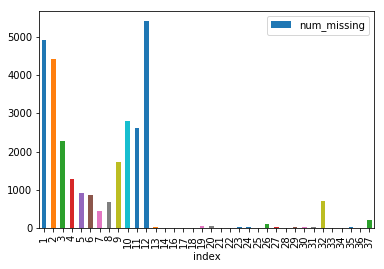

In [5]:
column_missing_count = {}

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    column_missing_count[col] = num_missing
    #print(col)
    
    if num_missing > 0:  
        print('created missing indicator for: {}, proportion missing: {}, {}/{}'.format(col, num_missing/len(df), num_missing, len(df)))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
print(ismissing_cols)
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts()
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
df.head()

In [6]:
#Remove rows with missing stringency measure data
#ind_missing = df[df['num_missing'] > 0].index
ind_missing = df[df['StringencyIndex'].isna()].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)
df = df.reset_index()
numcols = df.select_dtypes([np.number])

#df = df_less_missing_rows
#df = df[wantedcolumns]

(28503, 82)


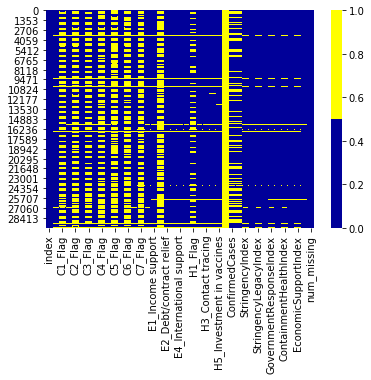

In [7]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(numcols.isnull(), cmap=sns.color_palette(colours))

In [8]:
countries = sorted(list(df['CountryName'].unique()))
@interact
def timeline(country=countries, x=widgets.IntSlider(min=1, max=len(df), step=1, value=5)):
    ndf = df[df['CountryName']==country]
    
    return ndf[0:x]

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [9]:
df.columns

Index(['index', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Containmen

In [10]:
firstcases = df[df['ConfirmedCases']>0].groupby('CountryName').apply(lambda x: min(x['Date']))
firstcases = pd.DataFrame(firstcases)
firstcases.head()
firstcases.columns = ['FirstCaseDate']

df = df.merge(firstcases, left_on='CountryName', right_on=firstcases.index, how='left')
df = df.dropna(subset=['FirstCaseDate'])

In [11]:
df.head()

index CountryName CountryCode       Date  C1_School closing  C1_Flag  \
0      0       Aruba         ABW 2020-01-01                0.0      NaN   
1      1       Aruba         ABW 2020-01-02                0.0      NaN   
2      2       Aruba         ABW 2020-01-03                0.0      NaN   
3      3       Aruba         ABW 2020-01-04                0.0      NaN   
4      4       Aruba         ABW 2020-01-05                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

       ...        StringencyLegacyIndex_ismissing  \
0      ...                                  False   
1      ...                                  False   
2      ...                                  False   
3      ...                                  False   
4      ...                                  False   

   StringencyLegacyIndexForDisplay_ismissing  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   GovernmentResponseIndex_ismissing  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   GovernmentResponseIndexForDisplay_ismissing  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ContainmentHealthIndex_ismissing  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   ContainmentHealthIndexForDisplay_ismissing  EconomicSupportIndex_ismissing  \
0                                       False                           False   
1                                       False                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   EconomicSupportIndexForDisplay_ismissing  num_missing  FirstCaseDate  
0                                     False           12     2020-03-13  
1                                     False           12     2020-03-13  
2                                     False           12     2020-03-13  
3                                     False           12     2020-03-13  
4                                     False           12     2020-03-13  

[5 rows x 84 columns]

In [12]:
df['DaysFromFirstCase'] = (df['Date'] - df['FirstCaseDate']).dt.days.astype('int64')
#df[df['CountryName']=='Albania']
#df['Country'].unique()

In [13]:
df = df[df['DaysFromFirstCase']>0]
outfn = 'data/PreprocessedTracker.csv'
df.to_csv(outfn, index=False)
df = pd.read_csv(outfn)
df.head()

index CountryName CountryCode        Date  C1_School closing  C1_Flag  \
0     73       Aruba         ABW  2020-03-14                0.0      NaN   
1     74       Aruba         ABW  2020-03-15                0.0      NaN   
2     75       Aruba         ABW  2020-03-16                3.0      1.0   
3     76       Aruba         ABW  2020-03-17                3.0      1.0   
4     77       Aruba         ABW  2020-03-18                3.0      1.0   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

         ...          StringencyLegacyIndexForDisplay_ismissing  \
0        ...                                              False   
1        ...                                              False   
2        ...                                              False   
3        ...                                              False   
4        ...                                              False   

   GovernmentResponseIndex_ismissing  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   GovernmentResponseIndexForDisplay_ismissing  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   ContainmentHealthIndex_ismissing  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   ContainmentHealthIndexForDisplay_ismissing  EconomicSupportIndex_ismissing  \
0                                       False                           False   
1                                       False                           False   
2                                       False                           False   
3                                       False                           False   
4                                       False                           False   

   EconomicSupportIndexForDisplay_ismissing  num_missing  FirstCaseDate  \
0                                     False           12     2020-03-13   
1                                     False           12     2020-03-13   
2                                     False           11     2020-03-13   
3                                     False           11     2020-03-13   
4                                     False           10     2020-03-13   

   DaysFromFirstCase  
0                  1  
1                  2  
2                  3  
3                  4  
4                  5  

[5 rows x 85 columns]

In [14]:
df.shape

(18194, 85)